# Plot the decoding accuracy for time decoder 
This is the decoding results last four reveal + end 1s with data enhancement. The data is enhanced. See the methods in data_enhancement.py

In [15]:
import numpy as np
import matplotlib.pyplot as plt

file_paths_last_4_reveal = [
    'output/R2490/R2490_decoding_l4.npy',  
    'output/R2487/R2487_decoding_l4.npy',
    'output/R2488/R2488_decoding_l4.npy',
    'output/R2490/R2490_decoding_l4.npy'
]
file_paths_last_10s = [
    'output/R2490/R2490_decoding_l10.npy',  
    'output/R2487/R2487_decoding_l10.npy',
    'output/R2488/R2488_decoding_l10.npy',
    'output/R2490/R2490_decoding_l10.npy'
]


(5, 500)


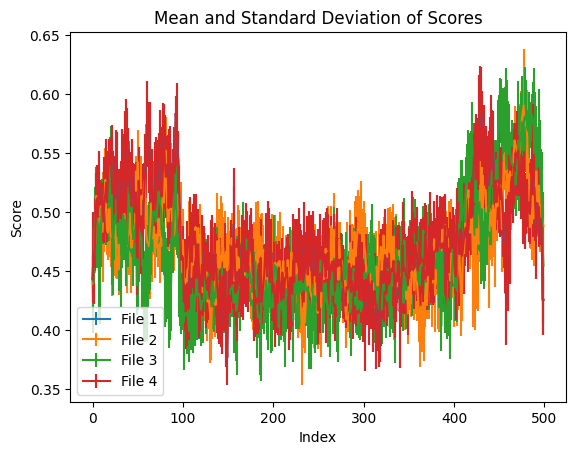

In [16]:
means = []
stds = []

for path in file_paths:
    score = np.load(path)
    score_mean = np.mean(score, axis=0)
    score_std = np.std(score, axis=0)
    means.append(score_mean)
    stds.append(score_std)

# Plotting
x = np.arange(len(means[0]))  # Assuming all files have the same shape
for i, (mean, std) in enumerate(zip(means, stds)):
    plt.errorbar(x, mean, yerr=std, label=f'File {i+1}')

plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Mean and Standard Deviation of Scores')
plt.legend()
plt.show()

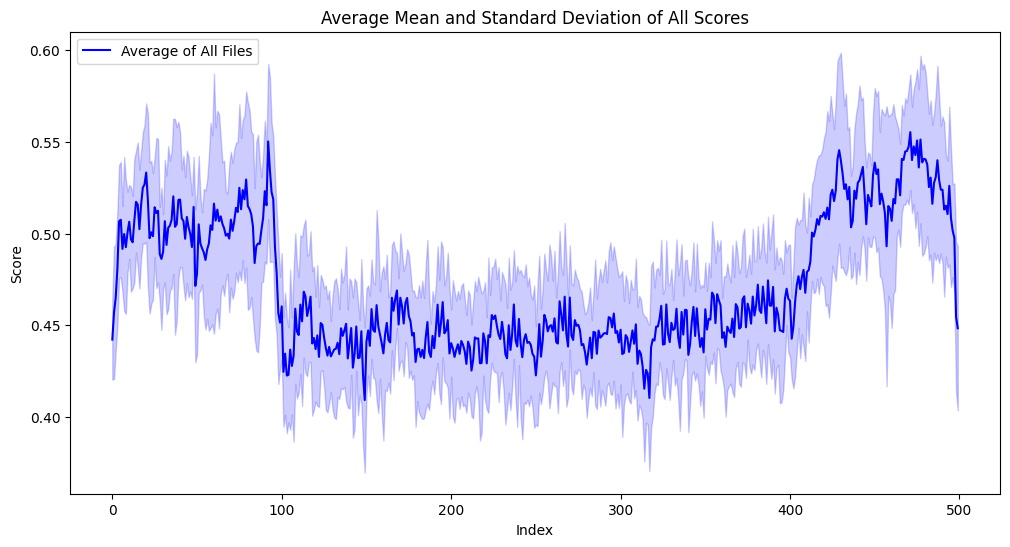

In [17]:
# Load all scores and stack them
all_scores = [np.load(path) for path in file_paths]
stacked_scores = np.stack(all_scores, axis=0)

# Reshape to combine all rows from all files
combined_scores = stacked_scores.reshape(-1, stacked_scores.shape[-1])

# Calculate mean and standard deviation across all rows and files
average_mean = np.mean(combined_scores, axis=0)
average_std = np.std(combined_scores, axis=0)

# Plotting
x = np.arange(len(average_mean))  # 500 points

plt.figure(figsize=(12, 6))
plt.plot(x, average_mean, label='Average of All Files', color='blue')
plt.fill_between(x, average_mean - average_std, average_mean + average_std, color='blue', alpha=0.2)

plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Average Mean and Standard Deviation of All Scores')
plt.legend()
plt.show()

# Plot the decoding accuracy for response locked decoder
See the decoding methods in response_lock.ipynb
You may not use reveal 5, bceasue it has less samples.

dict_keys([-1, 0, 1, 2, 3, 4])
dict_keys([-1, 0, 1, 2, 3, 4, 5])
dict_keys([-1, 0, 1, 2, 3, 4, 5])
dict_keys([-1, 0, 1, 2, 3, 4, 5])
dict_keys([-1, 0, 1, 2, 3, 4, 5])


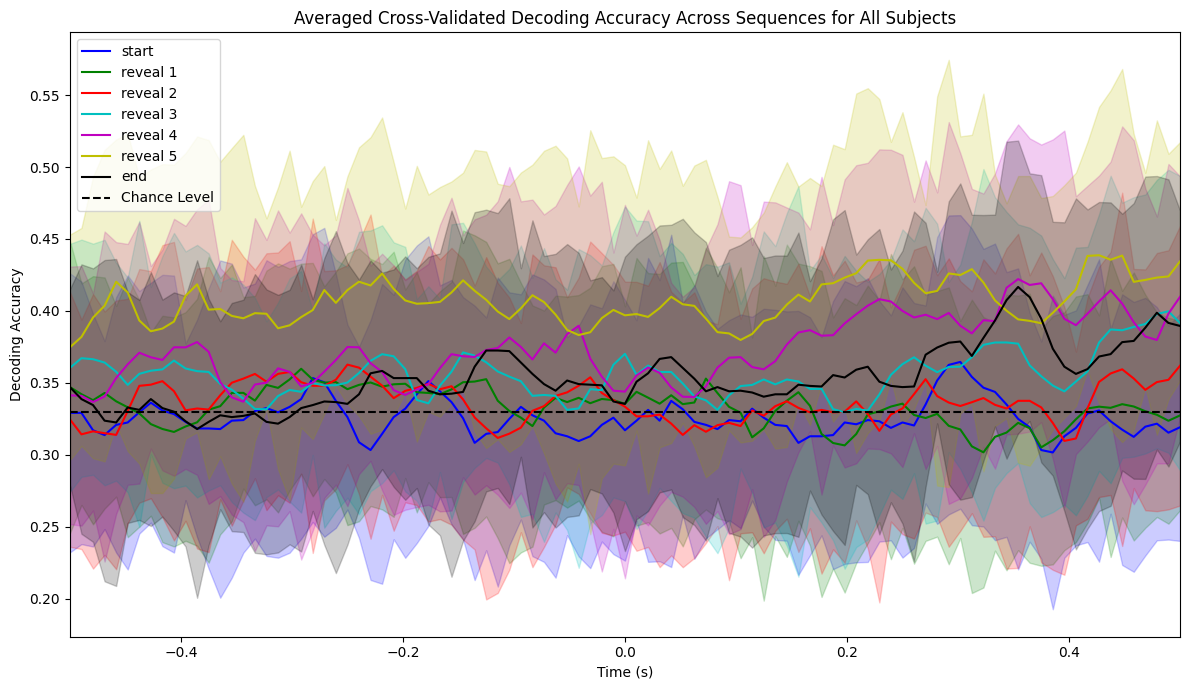

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
subj = ["R2210", "R2280", "R2487", "R2488", "R2490"]
colors = ['b', 'g', 'r', 'c', 'm', 'y','k']  # Colors for each sequence index
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 7))

accumulated_scores = {seq_idx: [] for seq_idx in range(6)}  # Assuming 6 sequence indices
accumulated_scores[-1] = []

for sub in subj:
    sequence_scores = np.load(f"output/{sub}/sequence_scoresCV_{sub}.npy", allow_pickle=True).item()
    print(sequence_scores.keys())
    # Accumulate scores for each sequence index
    for seq_idx, scores in sequence_scores.items():
        accumulated_scores[seq_idx].append(scores)


# Plot averaged cross-validation results for each sequence index
for seq_idx, scores_list in accumulated_scores.items():
    # Stack scores and compute mean and std across subjects
    stacked_scores = np.stack(scores_list)
    mean_scores = np.mean(stacked_scores, axis=(0, 1))  # Mean across subjects and splits
    std_scores = np.std(stacked_scores, axis=(0, 1))  # Std across subjects and splits

    # Apply moving average to smooth the mean scores
    smoothed_mean_scores = moving_average(mean_scores, window_size=4)  # Adjust window_size as needed

    # Time axis (adjust based on the actual time points in your data)
    n_time_points = smoothed_mean_scores.shape[0]
    time_axis = np.linspace(-0.5, 0.5, n_time_points)  # Example: -0.5 to 0.5 seconds

    if seq_idx == 0:
        label_name = 'start'
    elif seq_idx == -1:
        label_name = 'end'
    else:
        label_name = f"reveal {seq_idx}"
    
    plt.plot(time_axis, smoothed_mean_scores, label=label_name, color=colors[seq_idx % len(colors)])
    plt.fill_between(time_axis, smoothed_mean_scores - std_scores[:n_time_points], smoothed_mean_scores + std_scores[:n_time_points], alpha=0.2, color=colors[seq_idx % len(colors)])

# Customize the plot
plt.axhline(0.33, color='k', linestyle='--', label='Chance Level')  # Chance level
plt.xlim(-0.5, 0.5)
plt.xlabel("Time (s)")
plt.ylabel("Decoding Accuracy")
plt.title("Averaged Cross-Validated Decoding Accuracy Across Sequences for All Subjects")
plt.legend()
plt.tight_layout()
plt.show()

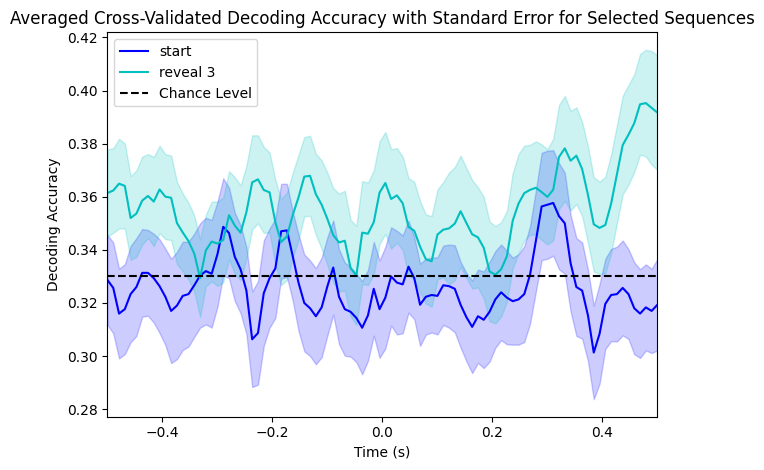

In [8]:
for seq_idx, scores_list in accumulated_scores.items():
    # Only plot for seq_idx = 0 and seq_idx = 4
    if seq_idx not in [0, 3]:
        continue

    # Stack scores and compute mean and std across subjects
    stacked_scores = np.stack(scores_list)
    mean_scores = np.mean(stacked_scores, axis=(0, 1))  # Mean across subjects and splits
    std_scores = np.std(stacked_scores, axis=(0, 1))  # Std across subjects and splits

    # Calculate standard error
    n_samples = stacked_scores.shape[0] * stacked_scores.shape[1]  # Total number of samples
    std_error = std_scores / np.sqrt(n_samples)

    # Apply moving average to smooth the mean scores
    smoothed_mean_scores = moving_average(mean_scores, window_size=5)  # Adjust window_size as needed
    smoothed_std_error = moving_average(std_error, window_size=5)  # Smooth the standard error

    # Time axis (adjust based on the actual time points in your data)
    n_time_points = smoothed_mean_scores.shape[0]
    time_axis = np.linspace(-0.5, 0.5, n_time_points)  # Example: -0.5 to 0.5 seconds

    if seq_idx == 0:
        label_name = 'start'
    elif seq_idx == -1:
        label_name = 'end'
    else:
        label_name = f"reveal {seq_idx}"
    plt.plot(time_axis, smoothed_mean_scores, label=label_name, color=colors[seq_idx % len(colors)])
    plt.fill_between(time_axis, smoothed_mean_scores - smoothed_std_error, smoothed_mean_scores + smoothed_std_error, alpha=0.2, color=colors[seq_idx % len(colors)])

# Customize the plot
plt.axhline(0.33, color='k', linestyle='--', label='Chance Level')  # Chance level
plt.xlim(-0.5, 0.5)
plt.xlabel("Time (s)")
plt.ylabel("Decoding Accuracy")
plt.title("Averaged Cross-Validated Decoding Accuracy with Standard Error for Selected Sequences")
plt.legend()
plt.tight_layout()
plt.show()

In [2]:

for seq_idx in [0, 1, 2,3,4,-1]:  # Calculate for seq_idx = 0, -1, and 2
    # Initialize a list to store scores for the current seq_idx
    all_scores = []
    
    scores_list = accumulated_scores[seq_idx]
    # Stack scores to combine all subjects and splits
    stacked_scores = np.stack(scores_list)
    # Flatten the scores to a single array
    all_scores.extend(stacked_scores.flatten())

    # Convert to a numpy array for calculation
    all_scores = np.array(all_scores)

    # Calculate the overall mean and standard deviation
    overall_mean = np.mean(all_scores)
    overall_std = np.std(all_scores)

    # Print the overall mean and standard deviation
    print(f"Overall average score for {seq_idx}:", overall_mean)
    print(f"Overall standard deviation for {seq_idx}:", overall_std)

Overall average score for 0: 0.32566666666666666
Overall standard deviation for 0: 0.09227585455217055
Overall average score for 1: 0.3333528985507246
Overall standard deviation for 1: 0.0886247193481712
Overall average score for 2: 0.3370413043478261
Overall standard deviation for 2: 0.0940051123524311
Overall average score for 3: 0.3559890118577075
Overall standard deviation for 3: 0.09228791444942994
Overall average score for 4: 0.3737519951840385
Overall standard deviation for 4: 0.10312751554238364
Overall average score for -1: 0.3533666666666667
Overall standard deviation for -1: 0.09836891446658
